In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 数据读取与描述
1. 读取数据集

In [2]:
data0 = pd.read_csv("medical_insurance.csv")
print("数据的特征有：", data0.info(), sep='\n')
data0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [3]:
data0.isnull().sum()

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [4]:
data0['alcohol_freq'].unique()

array([nan, 'Weekly', 'Daily', 'Occasional'], dtype=object)

根据输出结果，可以看出，数据集中有10000条数据，每条数据有53个特征（排除序号列）。其中有13个特征是 float64 类型，30 个特征是 int64 数值型的，10 个特征是非数值型的。alcohol_freq 特征存在缺失值，需要进行填充。它代表的是酒精饮料的消费频率，取值范围为 'Weekly', 'Daily', 'Occasional'。

### 数据预处理

In [5]:
df = data0.drop('person_id', axis=1)  ## 排除 person_id 列，新建一个数据，方便后续操作

# 查看填充前 alcohol_freq 的分布情况
print("填充前的分布:")
print(df['alcohol_freq'].value_counts(dropna=False))

mode_value = data0['alcohol_freq'].mode()[0]  # 计算众数
df['alcohol_freq'].fillna(mode_value, inplace=True)  # 使用众数填充缺失值

# 验证填充结果
print("\n填充后的分布:")    
print(df['alcohol_freq'].value_counts(dropna=False))
print(f"\n缺失值数量: {df['alcohol_freq'].isnull().sum()}")

填充前的分布:
alcohol_freq
Occasional    45078
NaN           30083
Weekly        19833
Daily          5006
Name: count, dtype: int64

填充后的分布:
alcohol_freq
Occasional    75161
Weekly        19833
Daily          5006
Name: count, dtype: int64

缺失值数量: 0


###  数据探索性分析
接下来对数据集进行探索性分析，以便更好地理解数据集。

#### float64 类型的描述性统计


In [6]:

df.select_dtypes(include=['float64']).describe() ## 计算所有 float 列的描述性统计信息

,income,bmi,systolic_bp,diastolic_bp,ldl,hba1c,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,avg_claim_amount,total_claims_paid
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.987390e+04,26.990512,117.808970,73.604770,119.975065,5.605968,3.598920,0.519849,3009.451907,582.320040,48.526668,656.512084,1377.878827
std,4.680021e+04,4.994883,15.369187,8.900924,30.262086,0.845996,0.594052,0.250669,3127.462822,399.583722,33.298640,1072.660048,2305.464687
min,1.100000e+03,12.000000,61.000000,40.000000,30.000000,3.540000,1.500000,0.000000,55.550000,211.670000,17.640000,0.000000,0.000000
25%,2.110000e+04,23.600000,107.000000,67.000000,99.400000,5.160000,3.200000,0.329700,1175.117500,352.070000,29.340000,0.000000,0.000000
50%,3.620000e+04,27.000000,117.000000,73.000000,120.000000,5.440000,3.600000,0.505500,2082.575000,463.585000,38.630000,318.015000,642.545000
75%,6.220000e+04,30.400000,128.000000,79.000000,140.300000,5.760000,4.010000,0.703300,3707.957500,666.697500,55.560000,872.215000,1795.522500
max,1.061800e+06,50.400000,183.000000,114.000000,248.300000,11.940000,5.000000,1.000000,65724.900000,10962.550000,913.550000,30010.530000,72517.950000


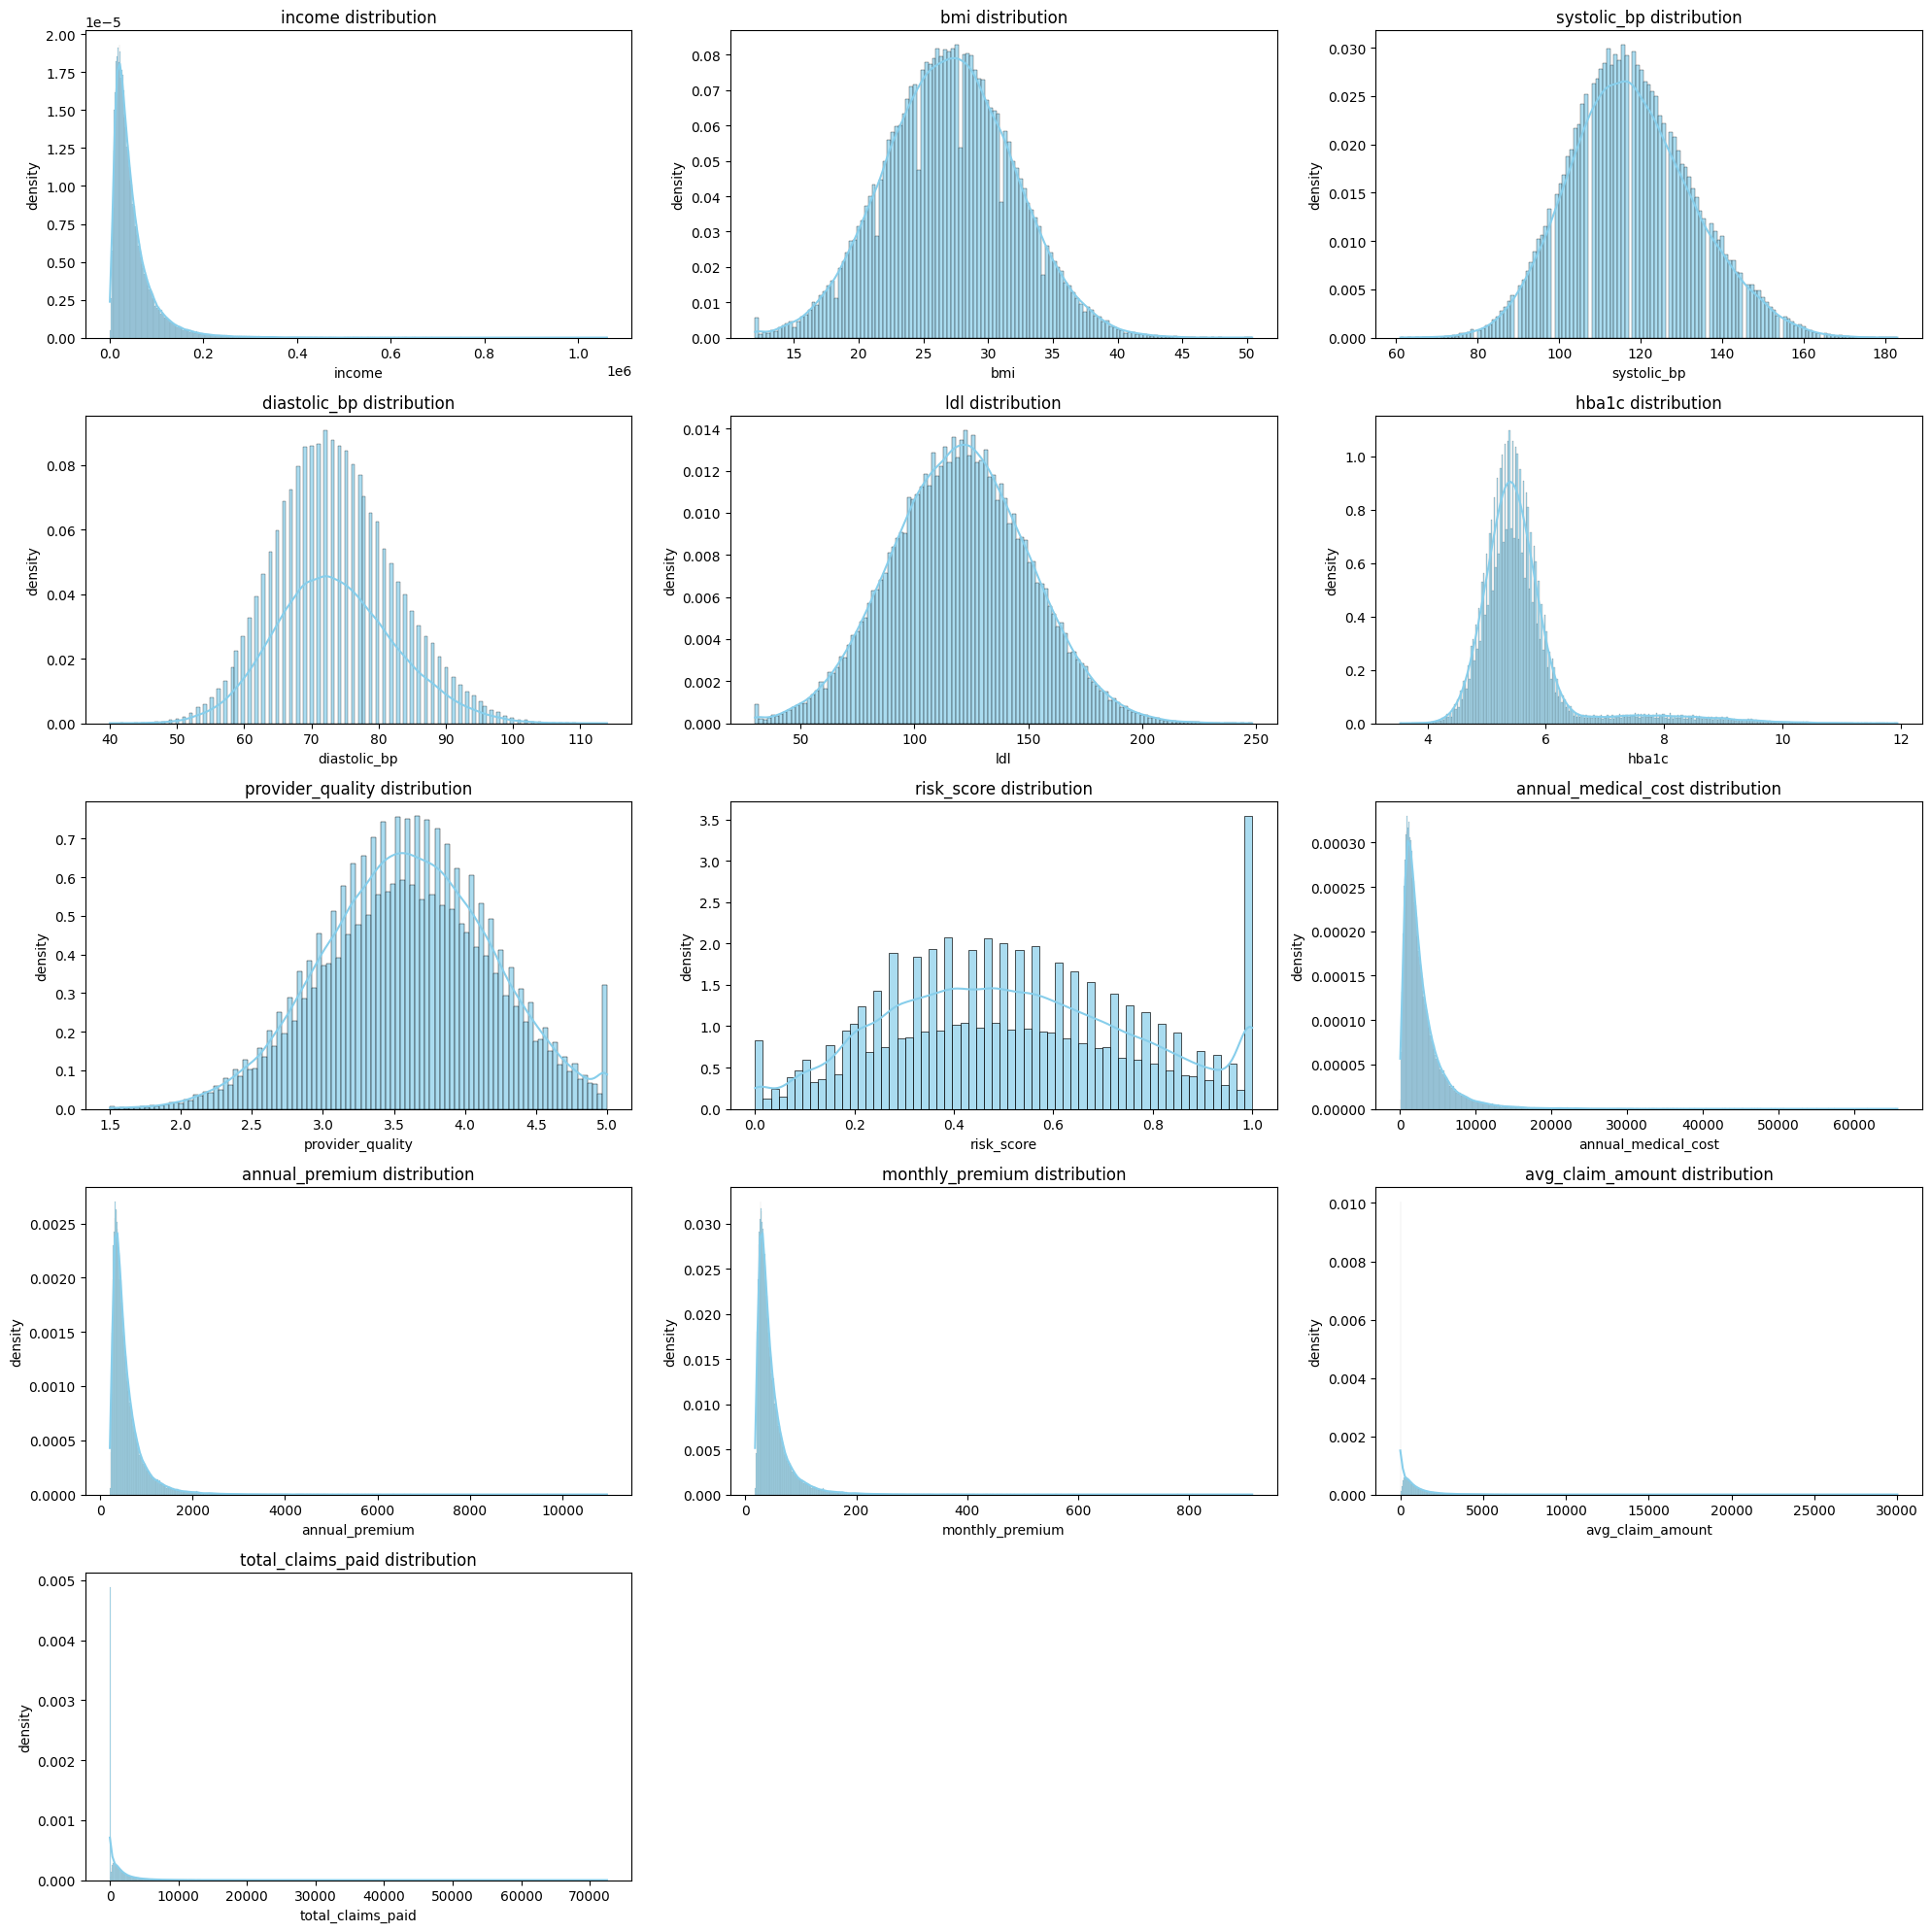

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 选择所有float型特征
float_columns = df.select_dtypes(include=['float64']).columns
# 创建子图
n_cols = 3
n_rows = math.ceil(len(float_columns) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))

# 将axes展平为一维数组（即使n_rows=1时也能正确处理）
axes = axes.ravel() if n_rows > 1 else [axes] if n_cols == 1 else axes.ravel()

for i, feature in enumerate(float_columns):
    # 在对应的子图上绘制，注意是 axes[i] 而不是直接调用sns.histplot
    sns.histplot(df[feature], kde=True, stat='density', alpha=0.7, color='skyblue', ax=axes[i])
    axes[i].set_title(f'{feature} distribution')
    axes[i].set_xlabel(feature)  # 改为xlabel更合适
    axes[i].set_ylabel('density')

# 隐藏多余的子图
for j in range(len(float_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#### int64 类型的描述性统计

In [8]:
df.select_dtypes(include=['int64']).describe()  ## 计算所有 int64 列的描述性统计信息

,age,household_size,dependents,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,deductible,copay,policy_term_years,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,47.521500,2.430900,0.898380,1.92765,0.093640,0.373350,1.236320,1226.725000,19.520400,5.517760,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,15.988752,1.075126,0.950654,1.73773,0.304848,1.373011,1.209358,1019.619375,10.286255,2.868827,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,500.000000,10.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,37.000000,2.000000,0.000000,1.00000,0.000000,0.000000,0.000000,500.000000,10.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,48.000000,2.000000,1.000000,2.00000,0.000000,0.000000,1.000000,1000.000000,20.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,58.000000,3.000000,1.000000,3.00000,0.000000,0.000000,2.000000,2000.000000,30.000000,8.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100.000000,9.000000,7.000000,25.00000,3.000000,21.000000,11.000000,5000.000000,50.000000,10.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


Text(0, 0.5, 'density')

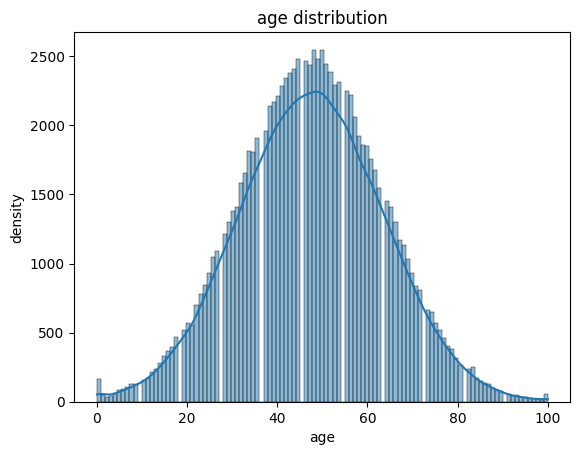

In [9]:
fig, axes = plt.subplots(1,1)
sns.histplot(df['age'], kde=True, ax=axes)
axes.set_xlabel('age')
axes.set_title(f'age distribution')
axes.set_ylabel('density')

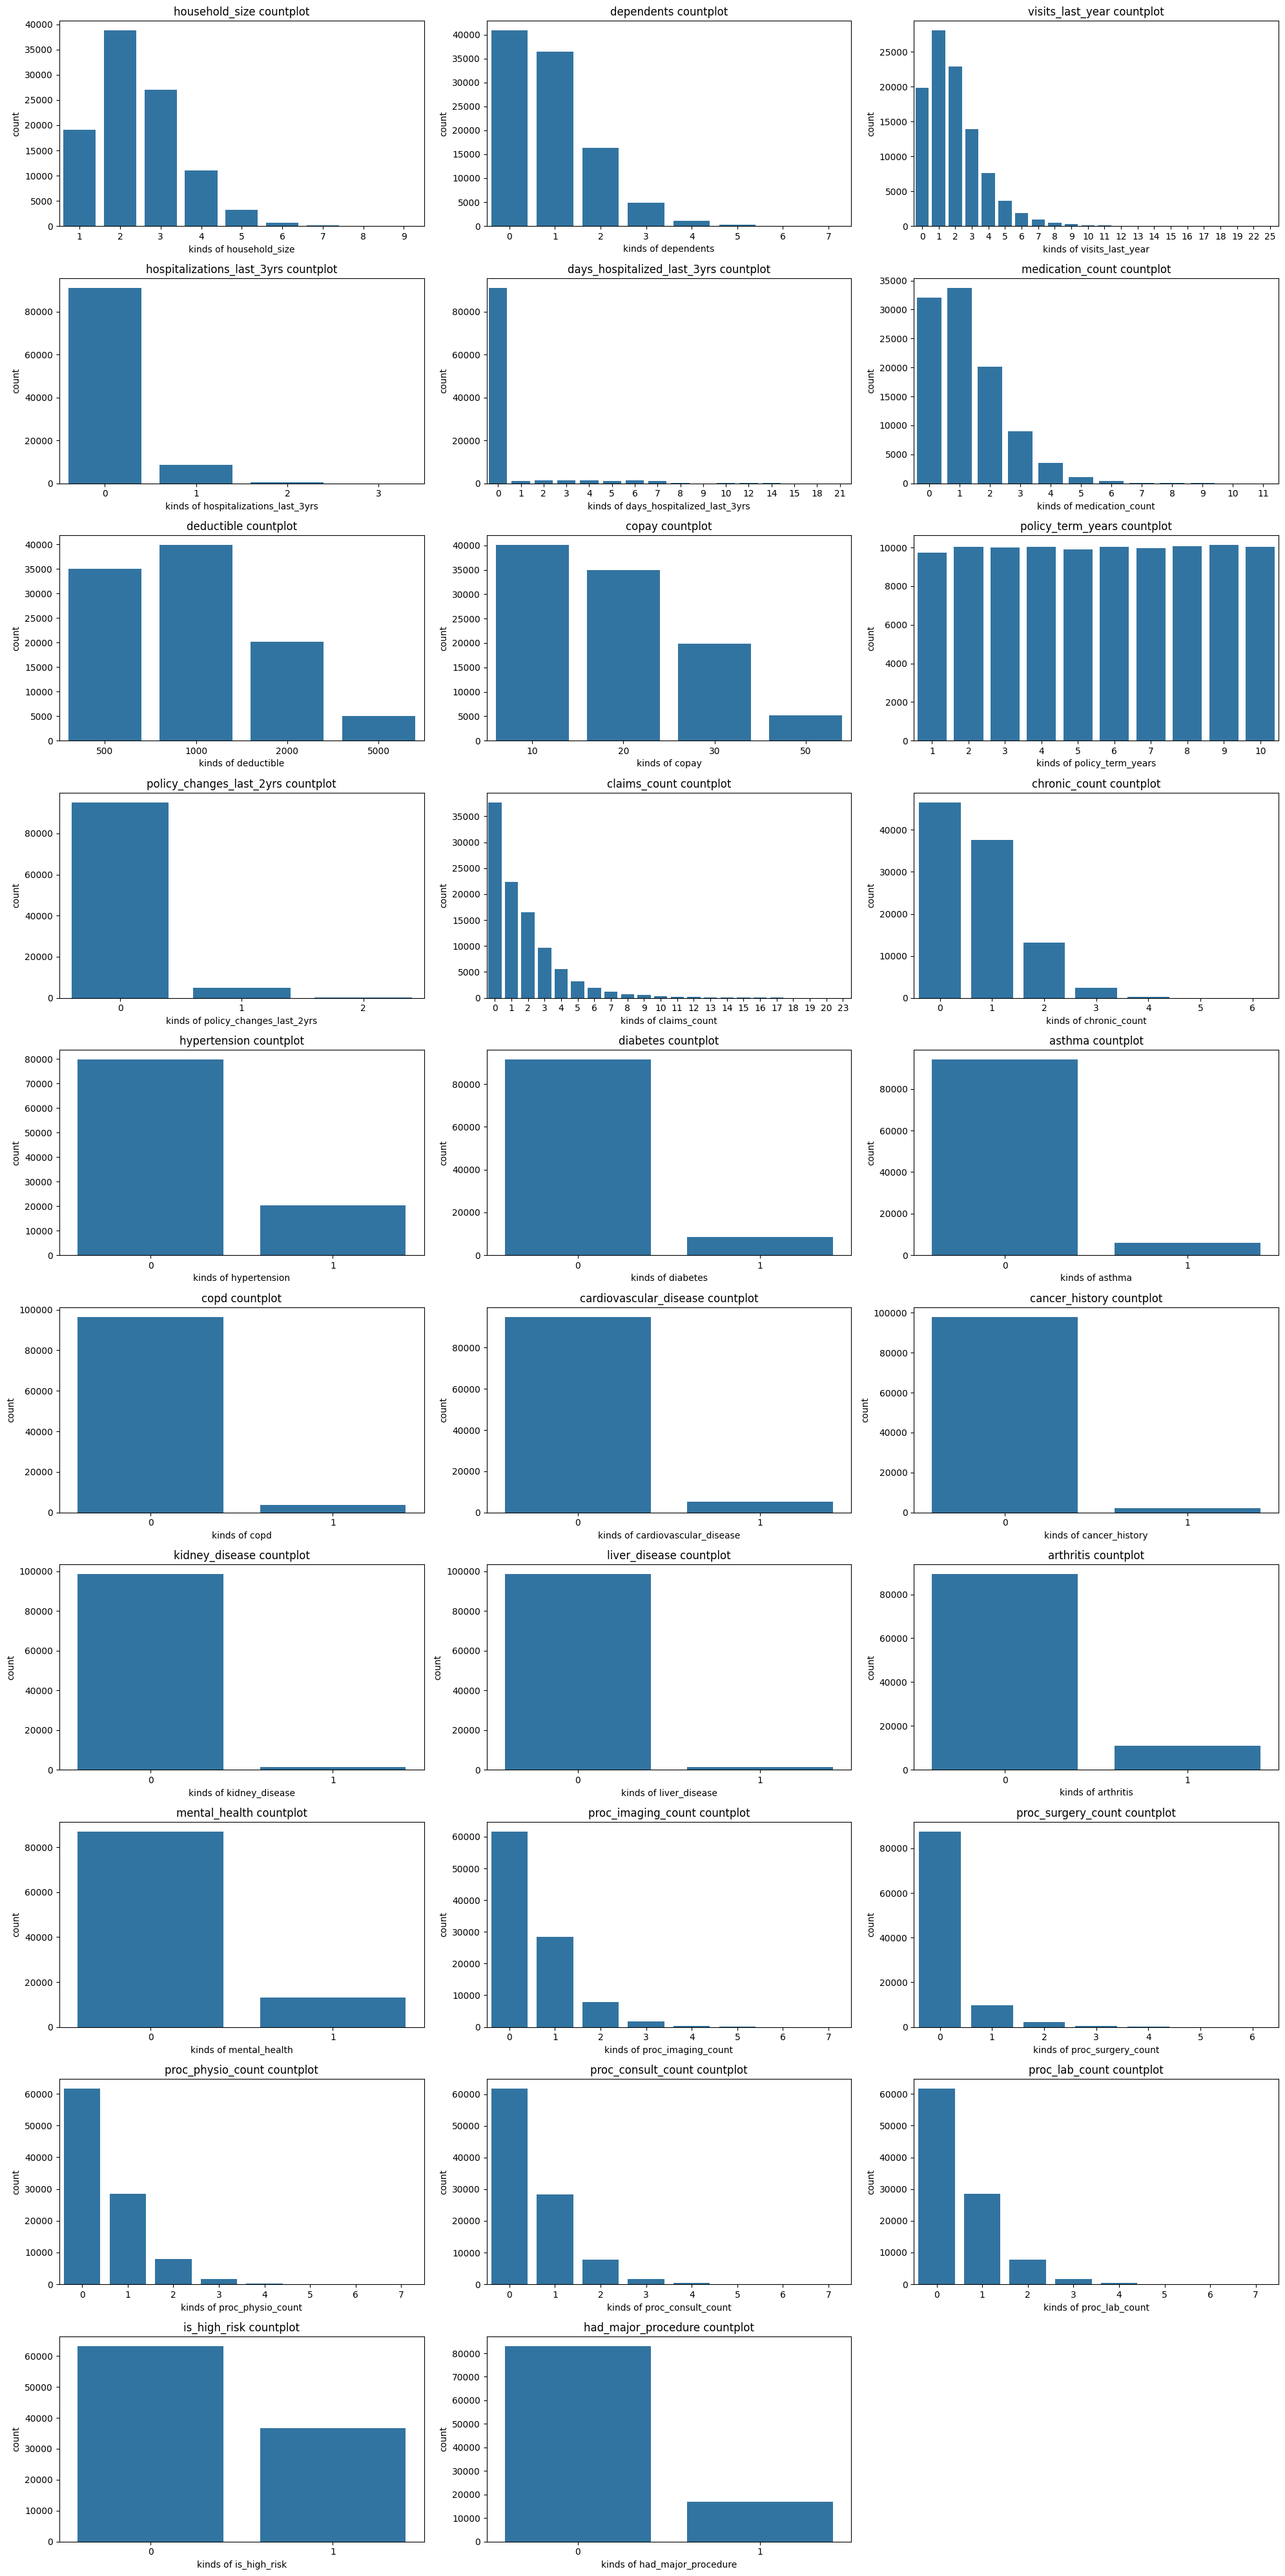

In [10]:
# 选择除 age 外的所有int 型特征
int_columns = df.select_dtypes(include=['int64']).columns.tolist()
int_columns.remove('age')

# 创建子图
n_cols = 3
n_rows = math.ceil(len(int_columns) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))

# 将axes展平为一维数组（即使n_rows=1时也能正确处理）
axes = axes.ravel()

for i, feature in enumerate(int_columns):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'{feature} countplot')
    axes[i].set_xlabel(f'kinds of {feature}')  # 改为xlabel更合适
    axes[i].set_ylabel('count')

# 隐藏多余的子图
for j in range(len(int_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#### 非数值型的描述统计

In [11]:
df.select_dtypes(include=['object']).describe()  ## 计算所有 object 列的描述性统计信息

,sex,region,urban_rural,education,marital_status,employment_status,smoker,alcohol_freq,plan_type,network_tier
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,3,5,3,6,4,4,3,3,4,4
top,Female,South,Urban,Bachelors,Married,Employed,Never,Occasional,PPO,Silver
freq,49193,28029,60019,27996,53252,55269,69709,75161,35167,40177


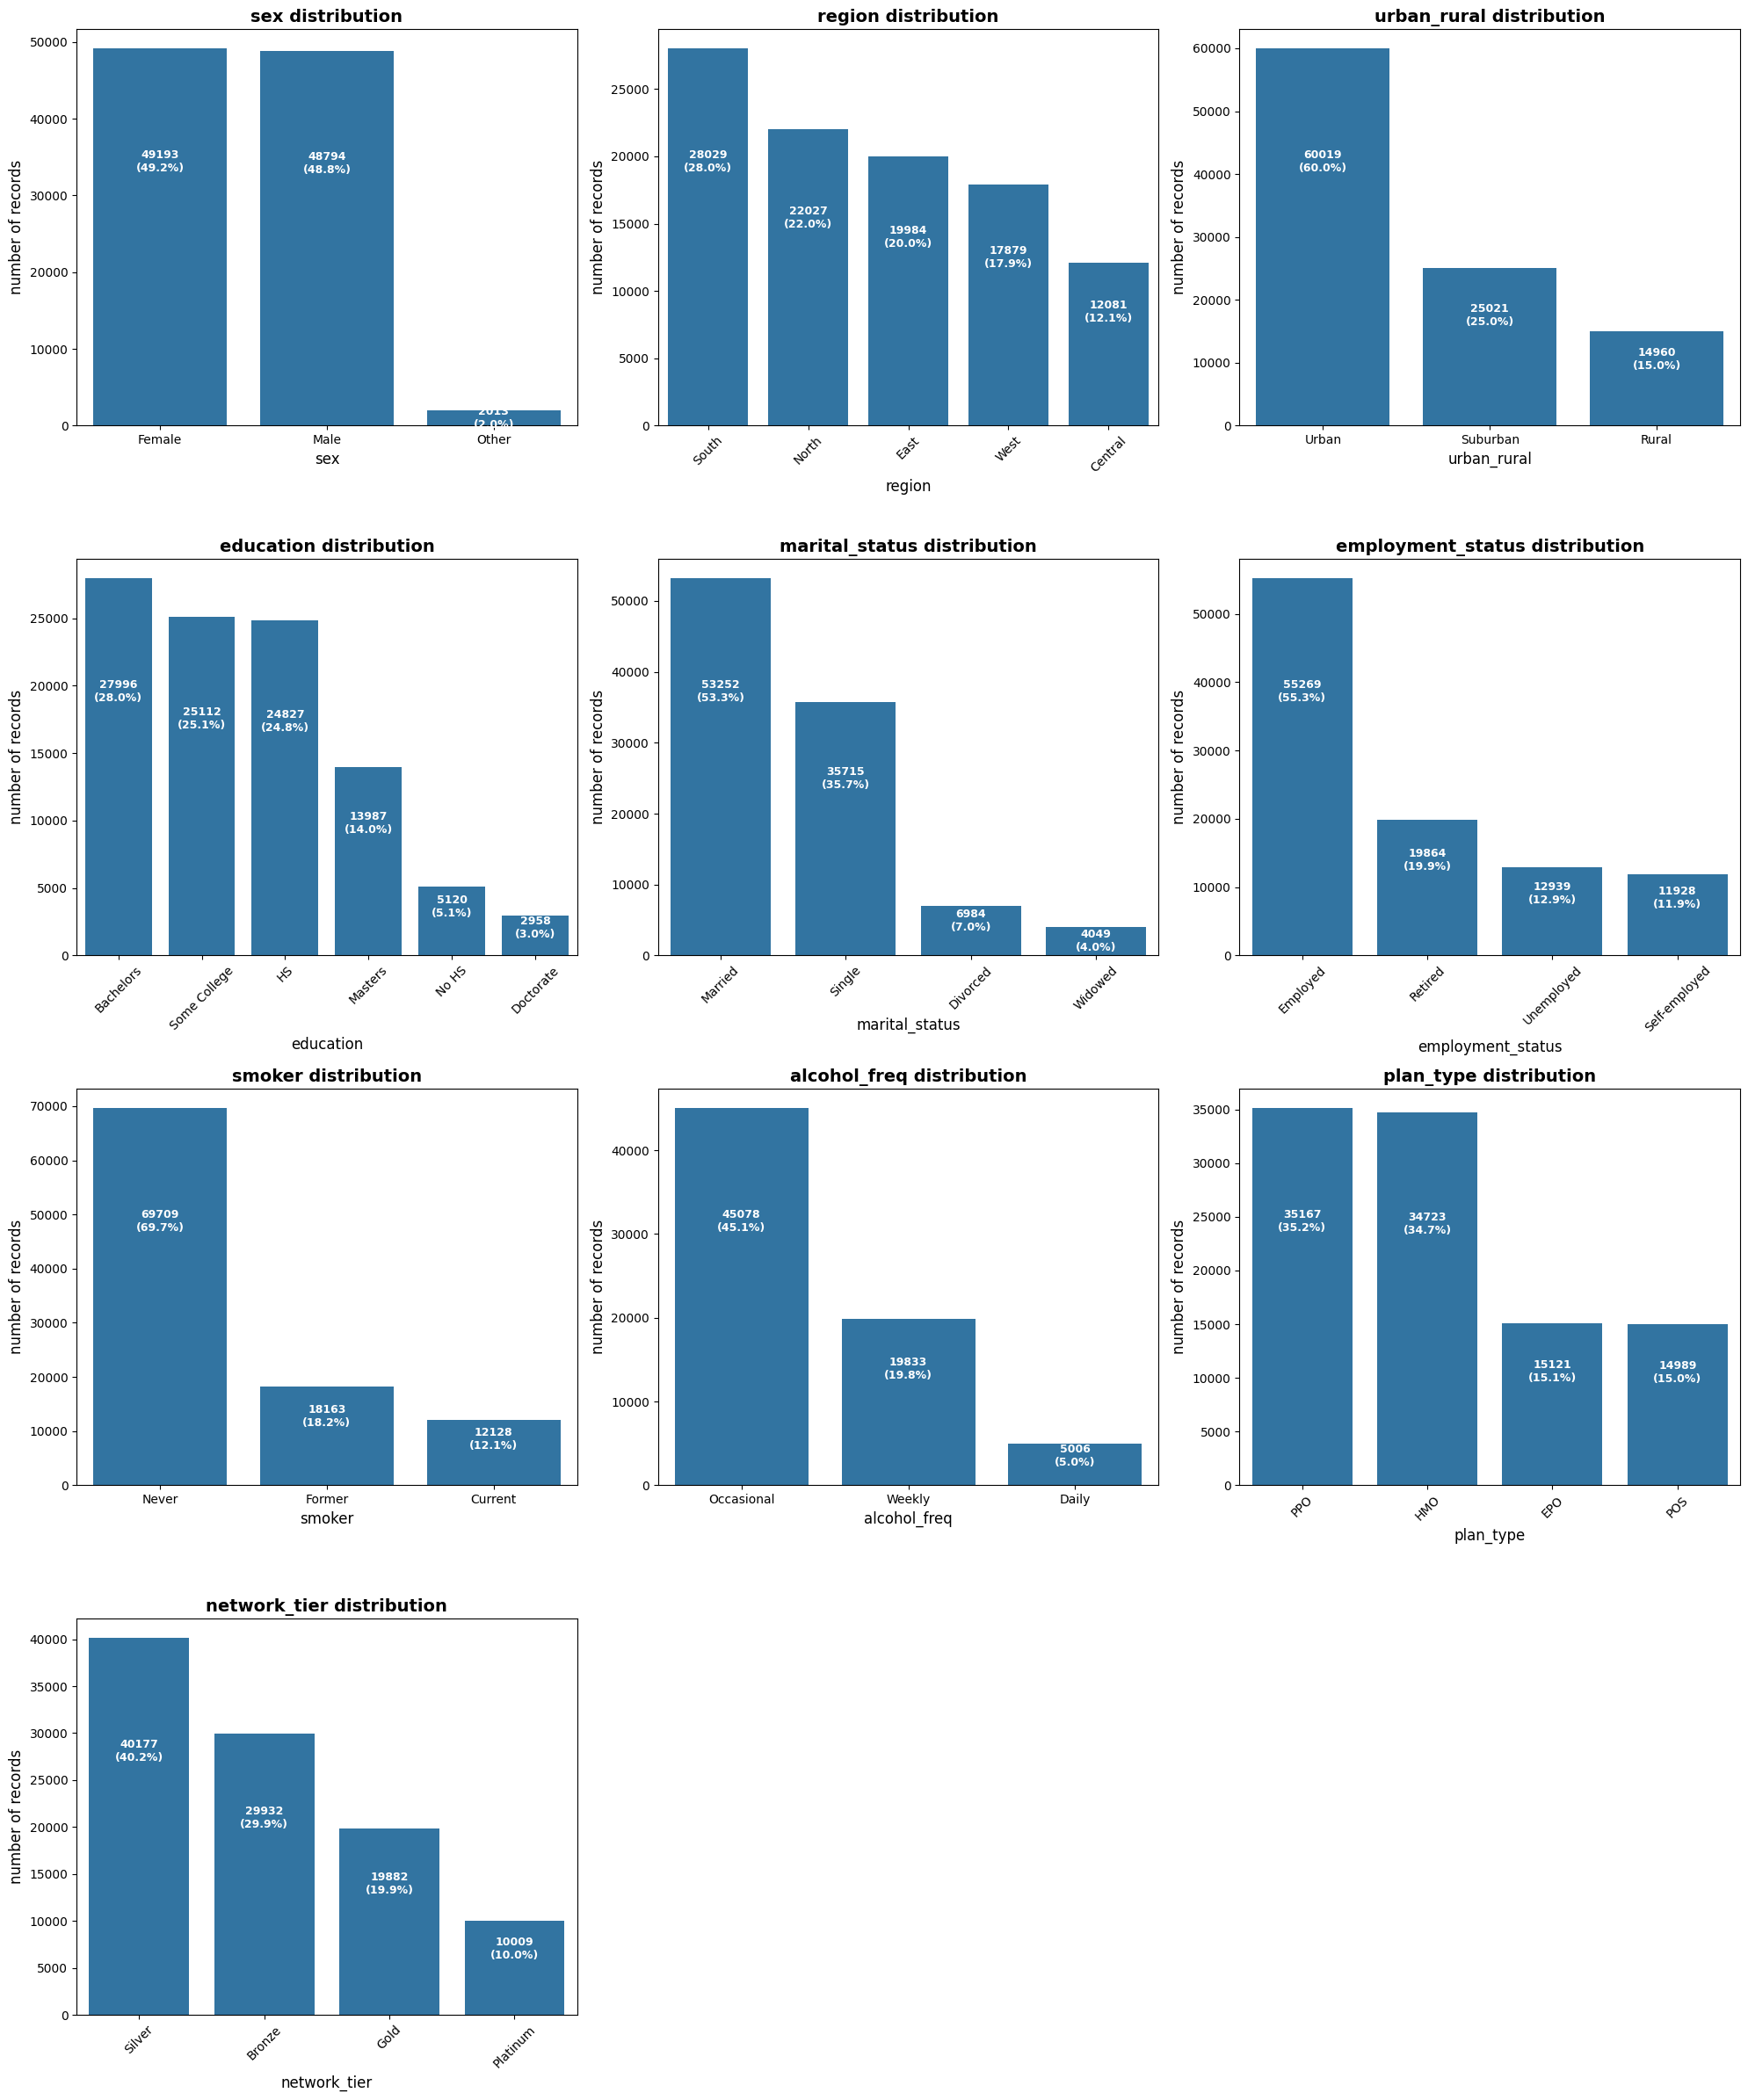

In [12]:
object_columns = data0.select_dtypes(include=['object']).columns.tolist()
n_cols = 3
n_rows = math.ceil(len(object_columns) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 6*n_rows))
axes = axes.ravel()

for i, feature in enumerate(object_columns):
    # 计算百分比
    value_counts = data0[feature].value_counts()
    percentages = (value_counts / len(data0) * 100).round(1)
    
    # 绘制countplot
    ax = sns.countplot(data=data0, x=feature, ax=axes[i], 
                      order=value_counts.index)  # 按频率排序
    axes[i].set_title(f'{feature} distribution', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('number of records', fontsize=12)
    
    # 旋转x轴标签
    if data0[feature].nunique() > 3:
        axes[i].tick_params(axis='x', rotation=45)
    
    # 在每个柱子内部显示数量和百分比
    for j, p in enumerate(ax.patches):
        height = p.get_height()
        if height > 0:
            category = value_counts.index[j]
            percentage = percentages[category]
            
            # 将文字放在柱子内部，位置在柱子的上半部分
            text_y = height * 0.7  # 柱子高度的70%位置
            text_x = p.get_x() + p.get_width() / 2.
            
            # 如果柱子太矮，调整文字位置到中间
            if height < max(ax.get_ylim()) * 0.1:
                text_y = height * 0.5
            
            ax.text(text_x, text_y,
                   f'{int(height)}\n({percentage}%)', 
                   ha='center', va='center', fontsize=9, fontweight='bold',
                   color='white')  # 白色文字在彩色柱子上更清晰

# 隐藏多余的子图
for j in range(len(object_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### 数据预处理
#### 数据异常值处理

In [13]:
df[df['age'] <= 20]

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
3,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,...,0,0,0,1,0,0,1,0,0,0
59,12,Male,Central,Suburban,52500.0,Masters,Divorced,Employed,2,1,...,0,0,0,0,0,1,0,0,0,0
78,19,Female,East,Rural,45900.0,Some College,Single,Unemployed,4,3,...,0,0,0,0,0,1,0,0,0,0
83,19,Male,South,Suburban,11200.0,HS,Married,Employed,4,2,...,0,0,0,0,0,1,1,1,0,0
89,10,Female,South,Urban,69000.0,Some College,Single,Employed,3,2,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99877,10,Male,North,Urban,106200.0,Masters,Married,Unemployed,3,1,...,0,0,0,0,0,1,0,0,0,0
99927,13,Female,North,Urban,34200.0,Some College,Divorced,Employed,2,1,...,0,0,0,0,0,1,0,0,0,0
99988,17,Female,North,Urban,17000.0,Some College,Single,Employed,1,0,...,0,0,0,1,0,0,1,0,0,0
99990,13,Male,South,Suburban,15800.0,Some College,Married,Employed,2,0,...,0,1,0,0,0,3,1,0,0,0


观察数据发现，年龄小于20岁的记录中存在数据异常：
- 存在非零收入（应为学生或无收入状态），部分还出现高收入
- 婚姻状态包含"已婚"、"离婚"等不符合该年龄段实际情况的状态

基于业务逻辑判断，这些记录存在明显的数据质量问题，把其作为异常数据进行删除处理。

In [14]:
df1 = df[df['age'] > 20]  # 删除异常数据



#### 非数值型数据转为数据型的数据

原始数据包含分类变量，需要转换为数值型以供机器学习算法使用。

编码策略：
有序变量（Ordinal Variables）- 使用序号编码（Ordinal Encoding）
   原因：这些变量存在内在的顺序关系，序号编码能保持这种顺序信息
   变量：education, smoker, alcohol_freq, network_tier

名义变量（Nominal Variables）- 使用独热编码（One-Hot Encoding）  
   原因：这些变量没有内在顺序，独热编码避免引入虚假的顺序关系
   变量：sex, region, urban_rural, marital_status, employment_status, plan_type
   参数：drop_first=True 以避免多重共线性问题


In [15]:
from sklearn.preprocessing import OrdinalEncoder


## 需要进行序号编码的有序变量
# **关键：必须按照逻辑顺序排列类别**
ordinal_features = {
    'education': ['No HS', 'HS', 'Some College', 'Bachelors', 'Masters', 'Doctorate'], # 高中以下 > 高中 > 大专 > 本科 > 硕士 > 博士
    'smoker': ['Never', 'Former', 'Current'], # 从不吸烟 -> 曾经吸烟 -> 当前吸烟 (风险递增)
    'alcohol_freq': ['Occasional', 'Weekly', 'Daily'], # 频率递增
    'network_tier': ['Bronze', 'Silver', 'Gold', 'Platinum'] # 等级递增
}

# 需要进行独热编码的名义变量
one_hot_features = ['sex', 'region', 'urban_rural', 'marital_status', 'employment_status', 'plan_type']


# 对有序变量进行序号编码
encoder = OrdinalEncoder(categories=[ordinal_features[feat] for feat in ordinal_features.keys()], dtype=np.int64)
df1[list(ordinal_features.keys())] = encoder.fit_transform(df1[list(ordinal_features.keys())])


# 对名义变量进行独热编码
df_final = pd.get_dummies(df1, columns=one_hot_features, drop_first=True, dtype=np.int64)


print(f"\n最终数据类型 (确认没有 object 类型):{df_final.dtypes=='object'}")

print("\n最终数据形状:", df_final.shape)


最终数据类型 (确认没有 object 类型):age                                False
income                             False
education                          False
household_size                     False
dependents                         False
                                   ...  
employment_status_Self-employed    False
employment_status_Unemployed       False
plan_type_HMO                      False
plan_type_POS                      False
plan_type_PPO                      False
Length: 64, dtype: bool

最终数据形状: (95394, 64)


C:\Users\A208-7\AppData\Local\Temp\ipykernel_27628\3068833424.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[list(ordinal_features.keys())] = encoder.fit_transform(df1[list(ordinal_features.keys())])


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95394 entries, 0 to 99999
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              95394 non-null  int64  
 1   income                           95394 non-null  float64
 2   education                        95394 non-null  int64  
 3   household_size                   95394 non-null  int64  
 4   dependents                       95394 non-null  int64  
 5   bmi                              95394 non-null  float64
 6   smoker                           95394 non-null  int64  
 7   alcohol_freq                     95394 non-null  int64  
 8   visits_last_year                 95394 non-null  int64  
 9   hospitalizations_last_3yrs       95394 non-null  int64  
 10  days_hospitalized_last_3yrs      95394 non-null  int64  
 11  medication_count                 95394 non-null  int64  
 12  systolic_bp            

In [17]:
# 保存预处理后的数据为CSV文件
df_final.to_csv('insurance_data_preprocessed.csv', index=False)

In [18]:
df_final.head()

,age,income,education,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,...,urban_rural_Urban,marital_status_Married,marital_status_Single,marital_status_Widowed,employment_status_Retired,employment_status_Self-employed,employment_status_Unemployed,plan_type_HMO,plan_type_POS,plan_type_PPO
0,52,22700.0,5,3,1,27.4,0,0,2,0,...,0,1,0,0,1,0,0,0,0,1
1,79,12800.0,0,3,1,26.6,0,1,2,0,...,1,1,0,0,0,0,0,0,1,0
2,68,40700.0,1,5,3,31.5,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,53,89600.0,5,2,0,30.5,0,2,3,0,...,0,1,0,0,0,1,0,0,1,0
5,63,305000.0,1,3,2,20.4,0,2,1,0,...,0,0,1,0,0,0,0,1,0,0
